# Classifying the Images (CIFAR-10) Using CNN's

## Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### Steps Followed:

- Importing libraries/Dataset
- Visualize the dataset
- Data prepartion / splitting the data
- Train the model
- Evaluate the model


### Step1 - Import Libraries and Dataset

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import cifar10

import keras

In [53]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [54]:
X_train.shape # 50000 (rows), 32(width), 32(height), 3(RGB - coloured)

(50000, 32, 32, 3)

In [55]:
X_test.shape

(10000, 32, 32, 3)

In [56]:
y_train.shape

(50000, 1)

In [57]:
y_test.shape

(10000, 1)

### Step2 - Visualize the data

[4]


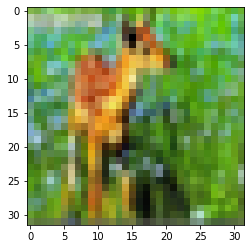

In [58]:
index = 1005
plt.imshow(X_train[index])
print(y_train[index])

C:\Users\sukes\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


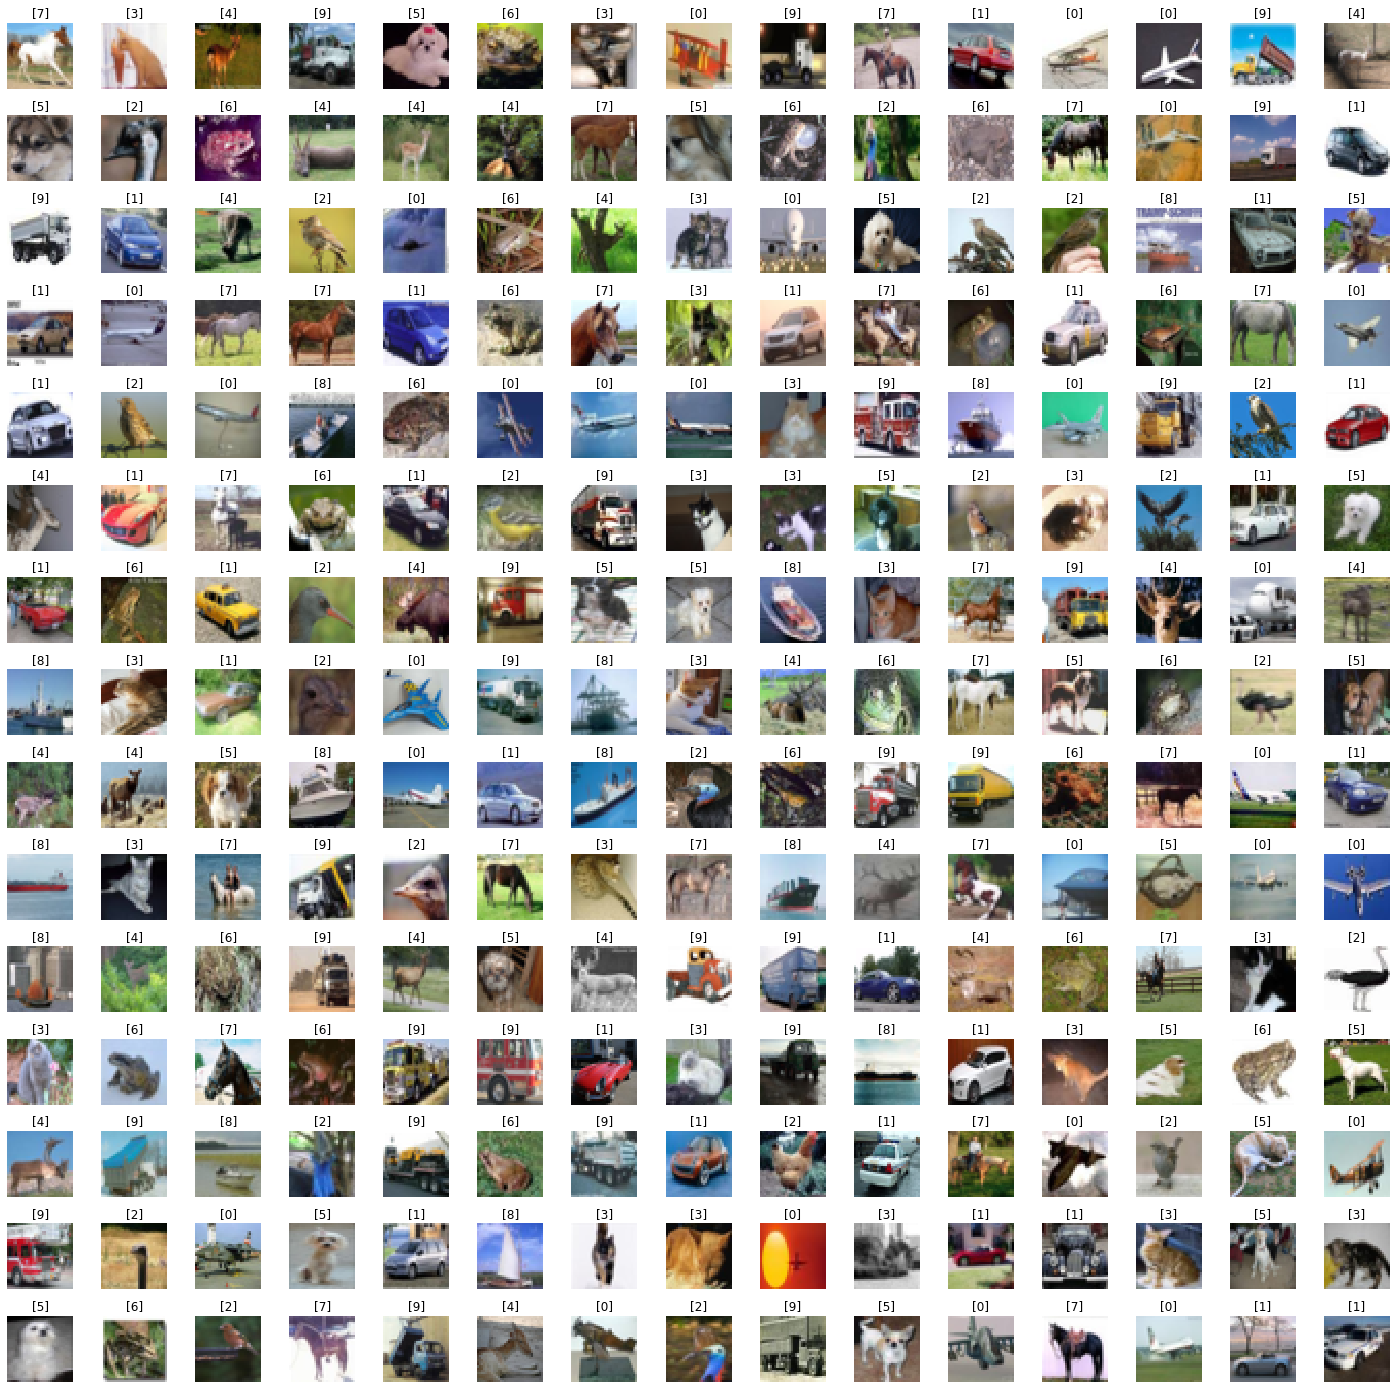

In [59]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

### Step3-Data preparation

In [62]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [63]:
X_train.dtype

dtype('float32')

In [64]:
# Converting into binary column/categorical column
import keras
y_train = keras.utils.to_categorical(y_train,10)

In [65]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_test = keras.utils.to_categorical(y_test,10)

In [67]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [68]:
# Data Normalization
X_train = X_train / 255
X_test = X_test / 255
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [69]:
y_train.dtype

dtype('float32')

In [70]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

### Step4 - Model Training

In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [44]:
cnn_model = Sequential()

In [72]:
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [73]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

In [74]:
history = cnn_model.fit(X_train,
                       y_train,
                       batch_size=32,
                       epochs=2,
                       shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5577 - accuracy: 0.4355
Epoch 2/2
1563/1563 [==============================] - 104s 67ms/step - loss: 1.1493 - accuracy: 0.5997


### Step-5 Model Evaluation

In [75]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy:',evaluation[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.9708 - accuracy: 0.6646
Test Accuracy: 0.6646000146865845


In [76]:
predicted_class = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [77]:
predicted_class

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [78]:
y_test = y_test.argmax(1)

In [80]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

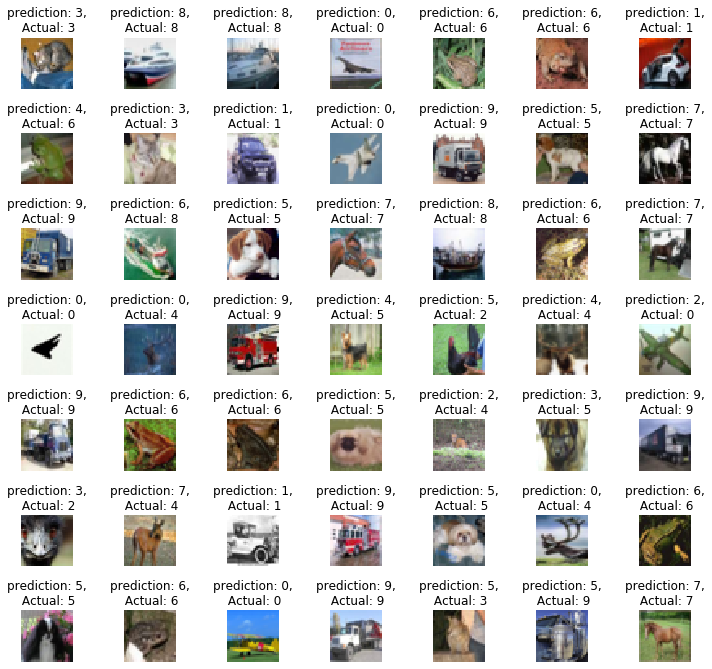

In [85]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'prediction: {predicted_class[i]},\n Actual: {y_test[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
cm = confusion_matrix(y_test, predicted_class)

In [88]:
cm

array([[726,  27,  62,  17,  41,  14,   2,  22,  69,  20],
       [ 21, 852,   8,   7,   7,  13,   6,   3,  27,  56],
       [ 77,   6, 453,  43, 184, 148,  32,  32,  12,  13],
       [ 20,   7,  63, 331, 123, 323,  40,  57,  15,  21],
       [ 23,   2,  45,  31, 737,  61,  18,  73,   9,   1],
       [ 12,   4,  53,  79,  59, 700,  14,  58,   8,  13],
       [  5,   6,  46,  58, 150,  70, 618,  28,   8,  11],
       [  5,   3,  31,  20,  96,  92,   3, 727,   3,  20],
       [ 87,  49,  17,  10,   9,  15,   3,  10, 785,  15],
       [ 42, 131,  10,  18,  11,  18,   2,  20,  31, 717]], dtype=int64)

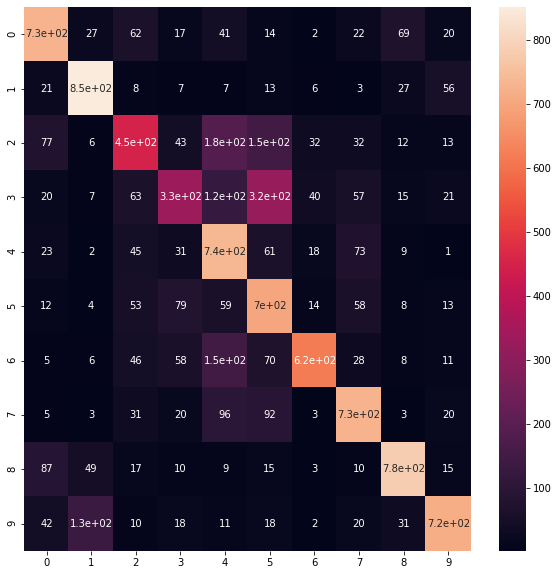

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

### Step6 - Save the model

In [91]:
import os

In [ ]:
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar1-_trained_model_h5')